# Hypothesis Testing

https://www.youtube.com/watch?v=2GU_R7G5m-8&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=3

## Testing for μ when σ is known.

### Z-statistic

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy import stats

%matplotlib inline

## $$z = \frac{\overline X-\mu}{\sigma/\sqrt{n}}$$

$\mu$ - population mean

$\sigma$ - population standard deviation

### calculations of z-value from p-value and inverse:

A low p-value makes our default action look improbable.

In [2]:
# probability to z
probability = 0.05
n_sided = 2 # 2-sided test
z = stats.norm.ppf(1-probability/n_sided)
print(z) # 1.959963984540054

# z to probability
probability = stats.norm.sf(z) * n_sided
print(probability) # 0.05

1.959963984540054
0.05


### example 1 - one-sided test

The manager of a department store is thinking about establishing a new billing system for the store's credit customers. She determines that the new system will be cost effective only if the mean monthly account is greater than 70USD. A random sample of 200 monthly accounts is drawn for which the sample mean account is 74USD. The manager knows that the accounts are normally distributed with a standard deviation of 30USD. Is there enough evidence at the 5% level of significance to conclude that the new system will be cost effective?

so we have:

$$H_0: \mu = 70$$
$$H_1: \mu > 70$$

In [3]:
mu_population = 70  # expected population mean
sigma_population = 30  # expected population standard deviation

n = 200
mean_sample = 74

n_sided = 1  # because it's right-sided test
alpha = 0.05

z_critical = stats.norm.ppf(1 - alpha / n_sided)  # calculation of boundaries of critical area in z-scale
z = (mean_sample - mu_population) / (sigma_population / (n ** 0.5))  # calculation of z-value

# z to p_value
p_value = (1 - stats.norm.cdf(abs(z))) * n_sided
# p_value = stats.norm.sf(abs(z)) * n_sided  # alternative form

print(f'z critical:\t {z_critical}')
print('z-value:\t', z)
print('p-value:\t', p_value)
print('z-value or p-value not in critical area\n:\t\t', z < z_critical and p_value > alpha)

z critical:	 1.6448536269514722
z-value:	 1.885618083164127
p-value:	 0.029673219395959904
z-value or p-value not in critical area
:		 False


#### let's illustrate our findings with the following plot:

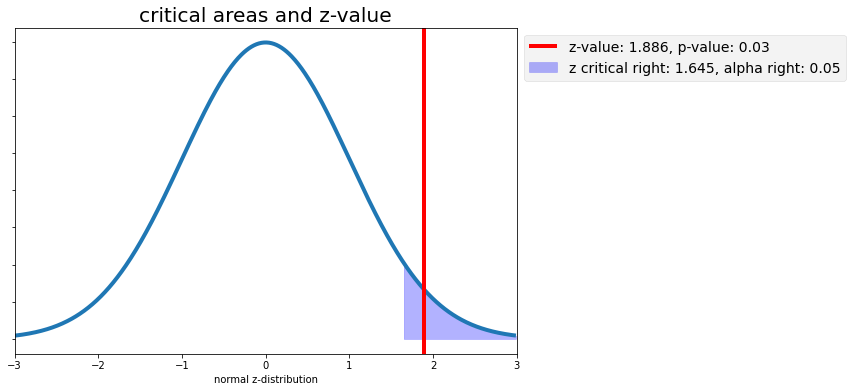

In [4]:
# defining x and y
normal_distribution = pd.DataFrame({
    'x': np.arange(-3, 3, 0.01),
    'y': stats.norm.pdf(np.arange(-3, 3, 0.01), 0, 1)
})

x = normal_distribution['x']
y = normal_distribution['y']

# establishing critical areas
# left:
# x_critical_left = normal_distribution.loc[normal_distribution['x'] < -z_critical, 'x']
# y_critical_left = normal_distribution.loc[normal_distribution['x'] < -z_critical, 'y']
# right:
x_critical_right = normal_distribution.loc[normal_distribution['x'] > z_critical, 'x']
y_critical_right = normal_distribution.loc[normal_distribution['x'] > z_critical, 'y']



# building the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x, y)

# painting critical areas
# left:
# ax.fill_between(x_critical_left, y_critical_left, 0, alpha=0.3, color='b', 
#                 label=f'z critical left: {round(-z_critical, 3)}')
# right:
ax.fill_between(x_critical_right, y_critical_right, 0, alpha=0.3, color='b', 
                label=f'z critical right: {round(z_critical, 3)}, alpha right: {alpha/n_sided}')

# drawing z-value line
ax.axvline(x=z, color='r', label=f'z-value: {round(z, 3)}, p-value: {round(p_value, 3)}')

# decorating the plot
ax.set_xlim([-3, 3])
ax.set_xlabel('normal z-distribution')
ax.set_yticklabels([])  # to remove y-bar
ax.set_title('critical areas and z-value')
ax.legend(bbox_to_anchor = (1.0, 1), loc='upper left')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

we reject $H_0$ at 5% of significance as z (1.88) $\not<$ 1.64 or p-value (0.029) $\not>$ alpha (0.05)

### example 2 - two-sided test

A road is being built, and it's expected to have 8500 cars/day. In the first 30 days of its operation there were 8120 cars/day. Using 1% level of significance, test whether the expectations were incorrect. Assume that the distribution of daily road users  is normally distributed with a standard deviation of 950.

so we have:

$$H_0: \mu = 8500$$
$$H_1: \mu \not= 8500$$

In [5]:
mu_population = 8500  # expected population mean
sigma_population = 950  # expected population standard deviation

n = 30
mean_sample = 8120

n_sided = 2  # because it's two-sided test
alpha = 0.01

z_critical = stats.norm.ppf(1 - alpha / n_sided)  # calculation of boundaries of critical area in z-scale
z = (mean_sample - mu_population) / (sigma_population / (n ** 0.5))  # calculation of z-value

# z to p_value
p_value = (1 - stats.norm.cdf(abs(z))) * n_sided
# p_value = stats.norm.sf(abs(z)) * n_sided  # alternative form

print(f'z critical:\t{-z_critical} and {z_critical}')
print('z-value:\t', z)
print('p-value:\t', p_value)
print('z-value or p-value not in critical area\n:\t\t', -z_critical < z < z_critical and p_value > alpha)

z critical:	-2.5758293035489004 and 2.5758293035489004
z-value:	 -2.1908902300206647
p-value:	 0.02845973691631065
z-value or p-value not in critical area
:		 True


#### let's illustrate our findings with the following plot:

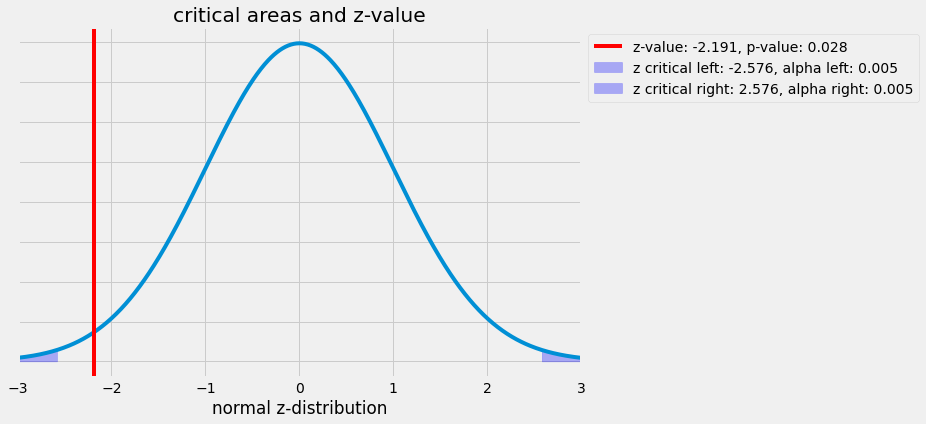

In [6]:
# defining x and y
normal_distribution = pd.DataFrame({
    'x': np.arange(-3, 3, 0.01),
    'y': stats.norm.pdf(np.arange(-3, 3, 0.01), 0, 1)
})

x = normal_distribution['x']
y = normal_distribution['y']

# establishing critical areas
# left:
x_critical_left = normal_distribution.loc[normal_distribution['x'] < -z_critical, 'x']
y_critical_left = normal_distribution.loc[normal_distribution['x'] < -z_critical, 'y']
# right:
x_critical_right = normal_distribution.loc[normal_distribution['x'] > z_critical, 'x']
y_critical_right = normal_distribution.loc[normal_distribution['x'] > z_critical, 'y']


# building the plot
fig, ax = plt.subplots(figsize=(9, 6))
plt.style.use('fivethirtyeight')
ax.plot(x, y)

# painting critical areas
# left:
ax.fill_between(x_critical_left, y_critical_left, 0, alpha=0.3, color='b', 
                label=f'z critical left: {round(-z_critical, 3)}, alpha left: {alpha/n_sided}')
# right:
ax.fill_between(x_critical_right, y_critical_right, 0, alpha=0.3, color='b', 
                label=f'z critical right: {round(z_critical, 3)}, alpha right: {alpha/n_sided}')

# drawing z-value line
ax.axvline(x=z, color='r', label=f'z-value: {round(z, 3)}, p-value: {round(p_value, 3)}')

# decorating the plot
ax.set_xlim([-3, 3])
ax.set_xlabel('normal z-distribution')
ax.set_yticklabels([])  # to remove y-bar
ax.set_title('critical areas and z-value')
ax.legend(bbox_to_anchor = (1.0, 1), loc='upper left')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

we do not reject $H_0$ at 1% of significance as $-2.57 < z (-2.19) < 2.57$ or p-value (0.028) > alpha (0.01)

## Testing for μ when σ is unknown

https://www.youtube.com/watch?v=Z8E3hi8INZk&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=5

## $$t = \frac{\overline X-\mu}{s/\sqrt{n}}$$

where:

### $$s^2=\frac{\sum(X-\overline X)^2}{n-1}$$

### example 3 - left-sided test

An online fashion store called Showdonkey advertises that its average delivery time is less than six hours. A random sample of the amount of time taken to deliver packages produced the following delivery times (rounded to the nearest hour): 7, 3, 4, 6, 10, 5, 6, 4, 3, 8. Is there enough evidence to support Showdonkey's advertisement at the 5% significance?

so we have:

$$H_0: \mu = 6$$
$$H_1: \mu < 6$$

we calculate t-statistic, and not z, because we don't know what the population standard deviation is

In [7]:
mu_population = 6

sample = np.array([7, 3, 4, 6, 10, 5, 6, 4, 3, 8])
sample_mean = sample.mean()
n = len(sample)
df = n - 1
s = (sum((sample - sample_mean) ** 2) / df) ** 0.5

n_sided = 1  # because it's left-sided test
alpha = 0.05

t_critical = stats.t.ppf(1 - 0.05 / n_sided, df=9)  # calculation of boundaries of critical area 
                                                     # in t-scale (student's t-distribution);
                                                     # t_critical is negative due to it's left-sided test   
t = (sample_mean - mu_population) / (s / (n ** 0.5))

# t to p_value
p_value = (1 - stats.t.cdf(abs(t), df=9)) * n_sided
# p_value = stats.t.sf(abs(t), df=9)  # alternative form

print(f't critical:\t {-t_critical}')
print('t-value:\t', t)
print('p-value:\t', p_value)
print('t-value/p-value not in critical area\n:\t\t', -t_critical < t and p_value > alpha)

t critical:	 -1.8331129326536335
t-value:	 -0.5570860145311562
p-value:	 0.29552561589180204
t-value/p-value not in critical area
:		 True


#### let's illustrate our findings with the following plot:

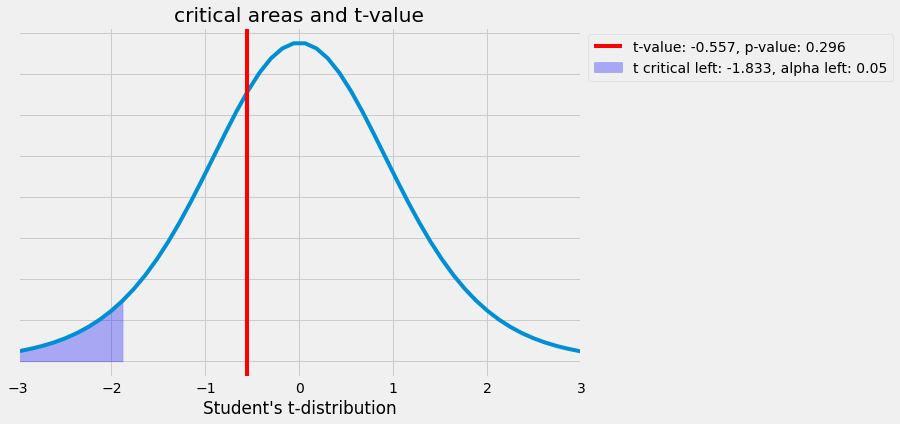

In [8]:
# defining x and y
rv = stats.t(df=9, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x)

students_t_distribution = pd.DataFrame({
    'x': x,
    'y': y
})

# establishing critical areas
# left:
x_critical_left = students_t_distribution.loc[students_t_distribution['x'] < -t_critical, 'x']
y_critical_left = students_t_distribution.loc[students_t_distribution['x'] < -t_critical, 'y']
# right:
# x_critical_right = students_t_distribution.loc[normal_distribution['x'] > z_critical, 'x']
# y_critical_right = students_t_distribution.loc[normal_distribution['x'] > z_critical, 'y']


# building the plot
fig, ax = plt.subplots(figsize=(9, 6))
plt.style.use('fivethirtyeight')
ax.plot(x, y)

# painting critical areas
# left:
ax.fill_between(x_critical_left, y_critical_left, 0, alpha=0.3, color='b', 
                label=f't critical left: {round(-t_critical, 3)}, alpha left: {alpha/n_sided}')
# right:
# ax.fill_between(x_critical_right, y_critical_right, 0, alpha=0.3, color='b', 
#                 label=f't critical right: {round(t_critical, 3)}, alpha right: {alpha/n_sided}')

# drawing t-value line
ax.axvline(x=t, color='r', label=f't-value: {round(t, 3)}, p-value: {round(p_value, 3)}')

# decorating the plot
ax.set_xlim([-3, 3])
ax.set_xlabel('Student\'s t-distribution')
ax.set_yticklabels([])  # to remove y-bar
ax.set_title('critical areas and t-value')
ax.legend(bbox_to_anchor = (1.0, 1), loc='upper left')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

we do not reject $H_0$ at 5% of significance as $t (-0.55) > -1.83$ or p-value (0.29) > alpha (0.05)